=== Informasi Umum Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF              

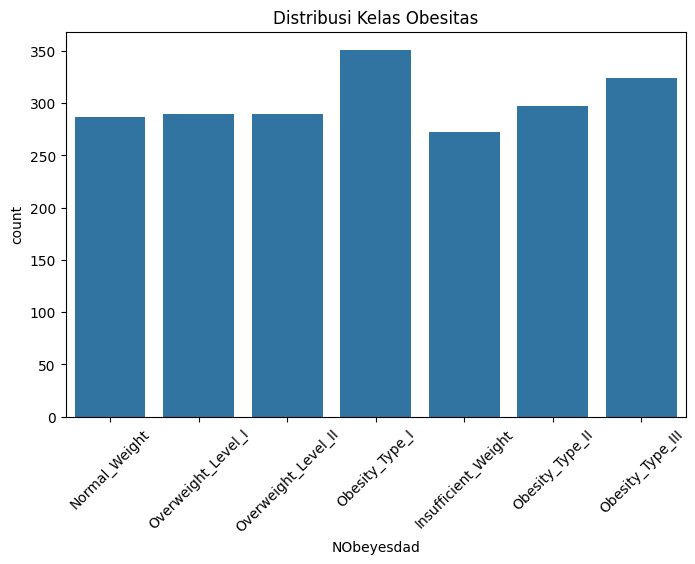


=== Missing Values ===
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

=== Jumlah Data Duplikat ===
18

=== Unique Values Per Kolom ===
Age: 1394 unique values
Gender: 3 unique values
Height: 1562 unique values
Weight: 1518 unique values
CALC: 5 unique values
FAVC: 3 unique values
FCVC: 808 unique values
NCP: 637 unique values
SCC: 3 unique values
SMOKE: 3 unique values
CH2O: 1263 unique values
family

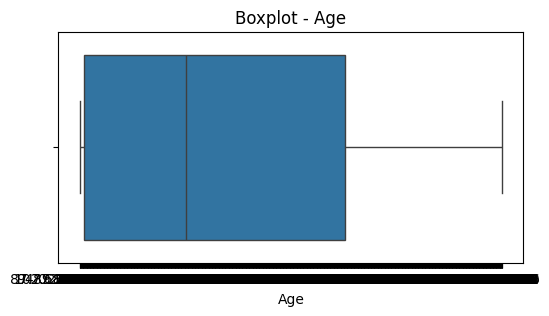

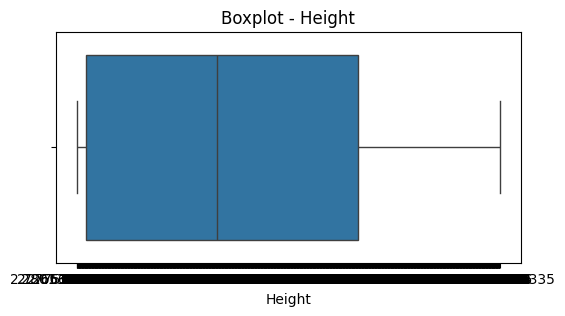

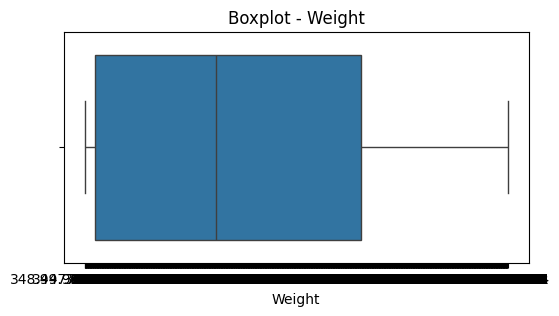

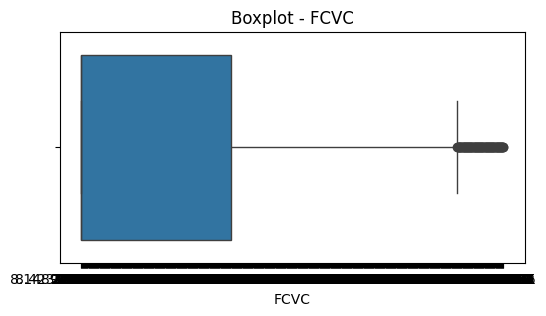

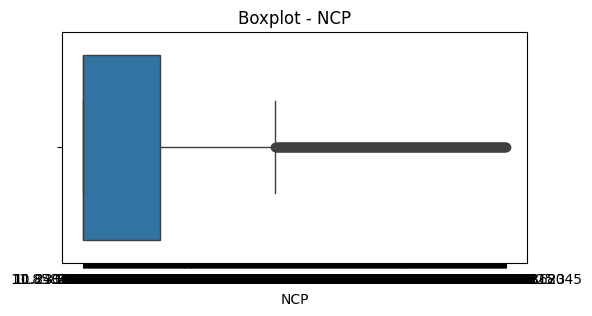

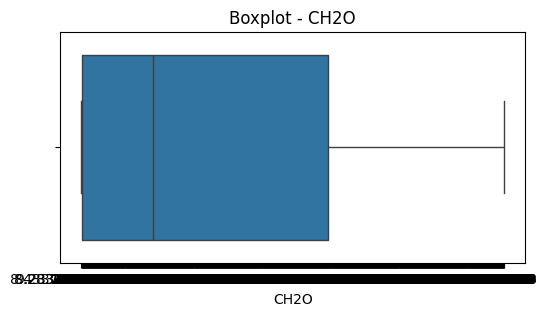

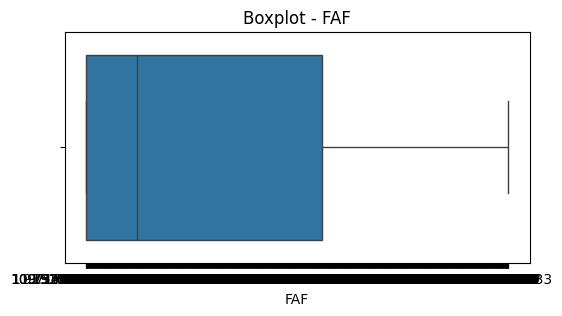

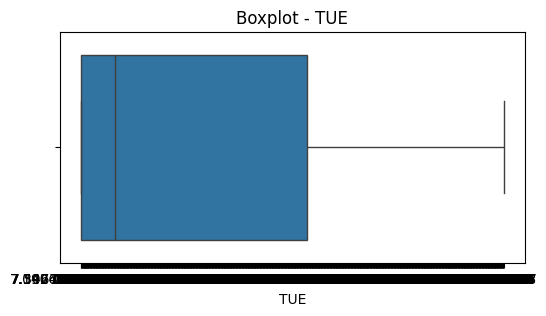

In [10]:
#1. EDA (Exploratory Data Analysis)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("ObesityDataSet.csv")

# Tampilkan informasi umum dataset
print("=== Informasi Umum Dataset ===")
print(df.info())
print("\n=== Deskripsi Statistik ===")
print(df.describe(include='all'))

# Tampilkan beberapa baris pertama
print("\n=== Beberapa Baris Pertama Data ===")
print(df.head())

# Visualisasi distribusi kelas target
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribusi Kelas Obesitas')
plt.xticks(rotation=45)
plt.show()

# Cek missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Cek duplikasi
print("\n=== Jumlah Data Duplikat ===")
print(df.duplicated().sum())

# Cek unique values per kolom
print("\n=== Unique Values Per Kolom ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Deteksi outlier menggunakan boxplot
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

In [11]:
#2. Preprocessing Data

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Tangani missing values dan error
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Encode variabel kategorikal
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Split fitur dan label
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Atasi ketidakseimbangan kelas
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

print("Preprocessing selesai.")

Preprocessing selesai.


In [12]:
#3. Pemodelan dan Evaluasi

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

# Definisikan model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion": confusion_matrix(y_test, y_pred)
    }

# Tampilkan hasil
import pandas as pd
for name, res in results.items():
    print(f"\n=== Model: {name} ===")
    print("Accuracy:", res["Accuracy"])
    print("Classification Report:")
    print(pd.DataFrame(res["Report"]).transpose())
    print("Confusion Matrix:")
    print(res["Confusion"])


=== Model: Logistic Regression ===
Accuracy: 0.6895787139689579
Classification Report:
              precision    recall  f1-score     support
0              0.764706  0.902778  0.828025   72.000000
1              0.711111  0.457143  0.556522   70.000000
2              0.666667  0.588235  0.625000   68.000000
3              0.689189  0.864407  0.766917   59.000000
4              0.938462  0.953125  0.945736   64.000000
5              0.571429  0.634921  0.601504   63.000000
6              0.423077  0.400000  0.411215   55.000000
accuracy       0.689579  0.689579  0.689579    0.689579
macro avg      0.680663  0.685801  0.676417  451.000000
weighted avg   0.687723  0.689579  0.681510  451.000000
Confusion Matrix:
[[65  6  0  0  0  0  1]
 [19 32  0  1  1 11  6]
 [ 0  0 40  9  1  8 10]
 [ 0  0  5 51  1  0  2]
 [ 0  0  0  0 61  1  2]
 [ 1  5  3  4  1 40  9]
 [ 0  2 12  9  0 10 22]]

=== Model: Random Forest ===
Accuracy: 0.9423503325942351
Classification Report:
              precision    

In [13]:
#4. Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning pada Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\n=== Hyperparameter Tuning Hasil ===")
print("Best Parameters:", grid.best_params_)
print("Accuracy setelah tuning:", accuracy_score(y_test, y_pred_best))
print("Classification Report setelah tuning:")
print(classification_report(y_test, y_pred_best))


=== Hyperparameter Tuning Hasil ===
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy setelah tuning: 0.9512195121951219
Classification Report setelah tuning:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.82      0.96      0.88        70
           2       0.98      0.96      0.97        68
           3       0.97      1.00      0.98        59
           4       1.00      1.00      1.00        64
           5       0.98      0.87      0.92        63
           6       0.96      0.93      0.94        55

    accuracy                           0.95       451
   macro avg       0.96      0.95      0.95       451
weighted avg       0.96      0.95      0.95       451



In [14]:
#5. Simpan Model untuk Deployment
import joblib

# Simpan model terbaik dan scaler
joblib.dump(best_rf, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model dan scaler berhasil disimpan.")

Model dan scaler berhasil disimpan.


In [15]:
#6. Deployment dengan Streamlit

import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Judul aplikasi
st.title("Prediksi Tingkat Obesitas")
st.write("Masukkan data pasien untuk memprediksi tingkat obesitas.")

# Load model dan scaler
model = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# Fungsi mapping hasil prediksi
obesity_map = {
    0: 'Insufficient Weight',
    1: 'Normal Weight',
    2: 'Overweight Level I',
    3: 'Overweight Level II',
    4: 'Obesity Type I',
    5: 'Obesity Type II',
    6: 'Obesity Type III'
}

# Input form
with st.form("input_form"):
    age = st.number_input("Umur", min_value=1, max_value=120)
    height = st.number_input("Tinggi Badan (meter)", min_value=0.5, max_value=2.5)
    weight = st.number_input("Berat Badan (kg)", min_value=10, max_value=200)
    fcvc = st.slider("Frequency of consumption of vegetables", 0, 3)
    ncp = st.slider("Number of main meals", 0, 5)
    ch2o = st.slider("Consumption of water daily", 0, 3)
    faf = st.slider("Physical activity frequency", 0, 3)
    tue = st.slider("Time using tech devices", 0, 3)
    caec = st.selectbox("Consumption of food between meals", ["Never", "Sometimes", "Frequently", "Always"])
    smoke = st.selectbox("Smoking", ["No", "Yes"])
    scc = st.selectbox("Calories consumption monitoring", ["No", "Yes"])
    favc = st.selectbox("High caloric food consumption", ["No", "Yes"])
    gender = st.selectbox("Gender", ["Female", "Male"])
    family_history = st.selectbox("Family history with overweight", ["No", "Yes"])

    submitted = st.form_submit_button("Prediksi")

if submitted:
    # Mapping input kategori ke numerik
    input_data = pd.DataFrame({
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'FCVC': [fcvc],
        'NCP': [ncp],
        'CH2O': [ch2o],
        'FAF': [faf],
        'TUE': [tue],
        'CAEC': [caec],
        'SMOKE': [smoke],
        'SCC': [scc],
        'FAVC': [favc],
        'Gender': [gender],
        'family_history_with_overweight': [family_history]
    })

    # Encode kategori
    input_data.replace({
        'CAEC': {'Never': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
        'SMOKE': {'No': 0, 'Yes': 1},
        'SCC': {'No': 0, 'Yes': 1},
        'FAVC': {'No': 0, 'Yes': 1},
        'Gender': {'Female': 0, 'Male': 1},
        'family_history_with_overweight': {'No': 0, 'Yes': 1}
    }, inplace=True)

    # Scaling
    scaled_input = scaler.transform(input_data)

    # Prediksi
    prediction = model.predict(scaled_input)[0]
    result = obesity_map.get(prediction, "Unknown")

    st.success(f"Tingkat Obesitas Prediksi: **{result}**")

2025-06-12 12:59:40.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:59:40.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:59:40.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:59:40.422 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:59:40.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:59:40.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:59:40.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:59:40.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar